# Support Vector Machine (SVR)

## Import the libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [50]:
df = pd.read_csv('Position_Salaries.csv')
# Independent variable
X = df.iloc[:, 1:-1].values
# Dependent variable
y = df.iloc[:, -1].values

In [51]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [52]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
# In this situation, we need apply feature scaling 
# to both dependent and independent variable
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1, 1))

In [54]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [55]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [56]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y.reshape(-1))

SVR()

## Predicting a new result

In [57]:
y_pred_scaled = regressor.predict(sc_X.transform([[6.5]]))
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

In [58]:
print(y_pred)

[[170370.0204065]]


## Visualising the SVR result

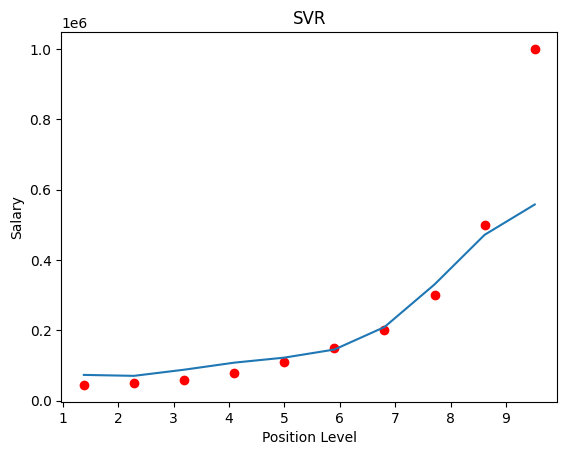

In [61]:
original_X = sc_X.inverse_transform(X)
original_y = sc_y.inverse_transform(y)
y_pred_inverse = sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1))

plt.scatter(original_X, original_y, color='red')
plt.plot(original_X, y_pred_inverse)
plt.title('SVR')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

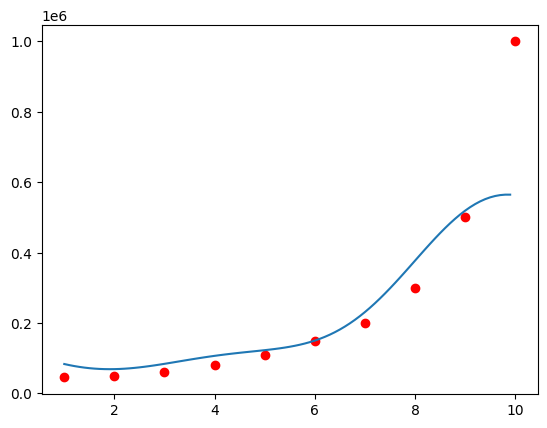

In [60]:
original_X = np.array(sc_X.inverse_transform(X))
original_y = sc_y.inverse_transform(y)

# Scaling X
X_range = np.arange(min(original_X.reshape(-1)), max(original_X.reshape(-1)), 0.1)
X_scaled = sc_X.fit_transform(X_range.reshape(-1, 1))
y_pred_inverse = sc_y.inverse_transform(regressor.predict(X_scaled).reshape(-1, 1))
# 
plt.scatter(original_X, original_y, color='red')
plt.plot(sc_X.inverse_transform(X_scaled), y_pred_inverse)
plt.show()